In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)

In [111]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [112]:
import matplotlib.pyplot as plt

In [113]:
import numpy as np

In [114]:
y = df.iloc[0:100, 4].values

In [115]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [116]:
X = df.iloc[0:100, [0,2]].values

In [117]:
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

In [118]:
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='veriscolor')

In [119]:
plt.xlabel('sepal length')

In [120]:
plt.ylabel('petal length')

In [121]:
plt.legend(loc='upper left')

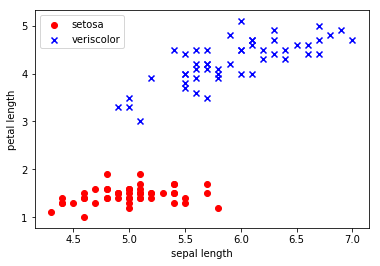

In [122]:
plt.show()

In [123]:
import perceptron

In [124]:
perceptron = perceptron.Perceptron(eta=0.1, n_iter=10)

In [125]:
perceptron.fit(X,y)

In [126]:
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')

In [127]:
plt.xlabel('Epochs')

In [128]:
plt.ylabel('Number of misclassifications')

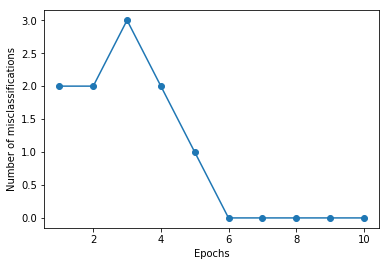

In [129]:
plt.show()

In [130]:
from matplotlib.colors import ListedColormap

In [131]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [132]:
plot_decision_regions(X,y,classifier=perceptron)

In [133]:
plt.xlabel('sepal length [cm]')

In [134]:
plt.ylabel('petal length [cm]')

In [135]:
plt.legend(loc='upper left')

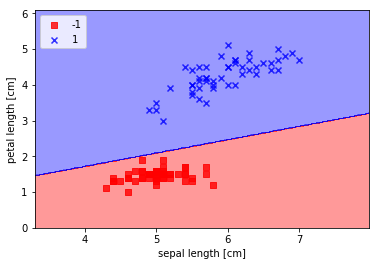

In [136]:
plt.show()

In [137]:
#This is where Adaline begins - may want to split into second notebook

In [138]:
import adalinegd

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

In [140]:
ada1 = adalinegd.AdalineGD(n_iter=10, eta=0.01).fit(X,y)

In [141]:
ax[0].plot(range(1, len(ada1.cost_) + 1), 
          np.log10(ada1.cost_), marker='o')

In [142]:
ax[0].set_xlabel('Epochs')

In [143]:
ax[0].set_ylabel('log(Sum-squared-error)')

In [144]:
ax[0].set_title('Adaline - Learning rate 0.01')

In [145]:
ada2 = adalinegd.AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

In [146]:
ax[1].plot(range(1, len(ada2.cost_) + 1),
          ada2.cost_, marker='o')

In [147]:
ax[1].set_xlabel('Epochs')

In [148]:
ax[1].set_ylabel('Sum-squared-error')

In [149]:
ax[1].set_title('Adaline - learning rate 0.0001')

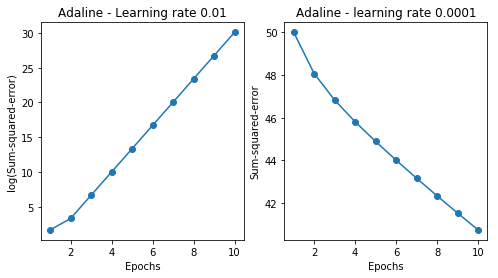

In [150]:
plt.show()

In [151]:
#Standardization of data

In [152]:
X_std = np.copy(X)

In [153]:
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()

In [154]:
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [155]:
#now train Adaline again with standardized data

In [156]:
ada = adaline.AdalineGD(n_iter=15, eta=0.01)

In [157]:
ada.fit(X_std, y)

In [158]:
plot_decision_regions(X_std, y, classifier=ada)

In [159]:
plt.title('Adaline - Gradient Descent')

In [160]:
plt.xlabel('sepal length [standardized]')

In [161]:
plt.ylabel('petal length [standardized]')

In [162]:
plt.legend(loc='upper left')

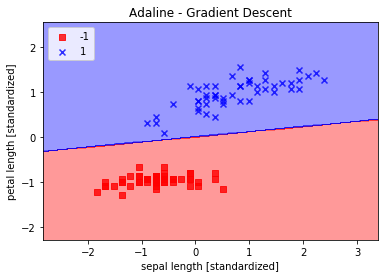

In [163]:
plt.show()

In [164]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

In [165]:
plt.xlabel('Epochs')

In [166]:
plt.ylabel('sum-squared-error')

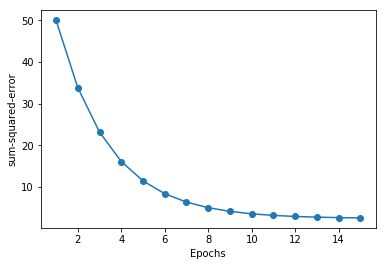

In [167]:
plt.show()

In [168]:
#Adaline with stochastic gradient descent


In [169]:
import adalinesgd

In [172]:
ada = adalinesgd.AdalineSGD(n_iter=15, eta=0.01, random_state=1)

In [173]:
ada.fit(X_std, y)

In [174]:
plot_decision_regions(X_std, y, classifier=ada)

In [175]:
plt.title('Adaline - Stochastic Gradient Descent')

In [177]:
plt.xlabel('sepal length [standardized]')

In [178]:
plt.ylabel('petal length [standardized]')

In [179]:
plt.legend(loc='upper left')

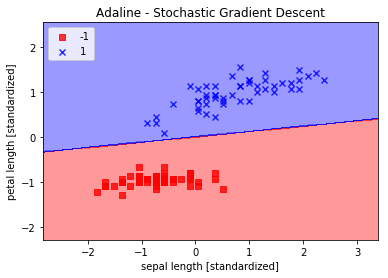

In [180]:
plt.show()

In [183]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')

In [184]:
plt.xlabel('Epochs')

In [185]:
plt.ylabel('Average Cost')

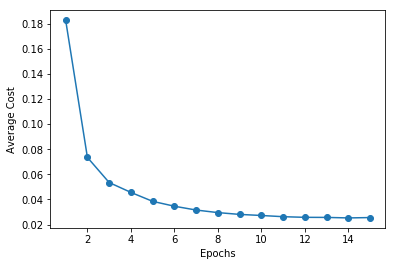

In [186]:
plt.show()